In [16]:
%pip install --upgrade numpy

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.9 kB 320.0 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/60.9 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 60.9/60.9 kB 539.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/13.1 MB ? eta -:--:--
    --------------------------------------- 0.3/13.1 MB 8.6 MB/s eta 0:00:02
   ------ --------------------------------- 2.1/13.1 MB 26.5 MB/s eta 0:00:01
   ------------ --------------------------- 4.1/13.1 MB 32.8 MB/s eta 0:00:01
   -------------------- ------------------- 6.7/13.1 MB 38.9 MB/s eta 0:00:01
   ----------------------------- ---------- 9.7/13.1 MB 44.6 MB/s eta 0:00:01
   ------------------------------------ --- 12.0/13.1 MB 59.5 MB/s eta 0:00:01
   ---------------------------------------  13.1/13.1 MB 54.4 MB/s eta 0

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
py4cats 3.4.0 requires numpy<2.0.0,>=1.24.3, but you have numpy 2.3.4 which is incompatible.
astropy 5.3.4 requires numpy<2,>=1.21, but you have numpy 2.3.4 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.3.4 which is incompatible.
matplotlib 3.8.0 requires numpy<2,>=1.21, but you have numpy 2.3.4 which is incompatible.
numba 0.59.0 requires numpy<1.27,>=1.22, but you have numpy 2.3.4 which is incompatible.
pandas 2.1.4 requires numpy<2,>=1.23.2; python_version == "3.11", but you have numpy 2.3.4 which is incompatible.
pywavelets 1.5.0 requires numpy<2.0,>=1.22.4, but you have numpy 2.3.4 which is inc

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import os
import rasterio

sys.modules['numpy._core.numeric'] = np
import plotly.graph_objects as go
import mplcursors
#base_dir = r'X:\Dropbox\2024_Campaign\2024_Aircraft\O2_band_calcs'
base_dir = r'C:\Users\chris\Dropbox\2024_Aircraft\O2_band_calcs'
#base_dir = r'C:\Users\cmedcraf\Dropbox\SCU\Scripts\py4cats'

os.chdir(base_dir)

In [20]:
fit_results = pd.read_csv('data/fit_results.csv')
spectra = pd.read_pickle('data/o2_spectra_ratios.pkl')

AttributeError: Can't get attribute '_frombuffer' on <module 'numpy' from 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\numpy\\__init__.py'>

In [10]:
filepath = r"data\images\cloud1_02_Mjolnir_float32_geo_VS620_o2test1.bsq.dat"

In [11]:
# Open the BSQ file with rasterio
with rasterio.open(filepath) as src:
    # Read the image data as a 3D numpy array (bands, rows, cols)
    image_array = src.read(1)  # This returns a 3D array (bands, rows, cols)
    mask = image_array == 1
    image_array[mask] = -999
    # Get metadata
    bands = src.count
    rows = src.height
    cols = src.width
    print(f"Image Dimensions: {rows}x{cols}, Bands: {bands}")
    # Mask NoData values (-999) and compute min/max
    valid_pixels = image_array[image_array != -999]
    min_value = np.min(valid_pixels)
    max_value = np.max(valid_pixels)

    print(f"Min Value (Band 1): {min_value}")
    print(f"Max Value (Band 1): {max_value}")

print("Hyperspectral image loaded successfully!")

Image Dimensions: 7854x8818, Bands: 1
Min Value (Band 1): 0.5418338179588318
Max Value (Band 1): 0.6674152612686157
Hyperspectral image loaded successfully!


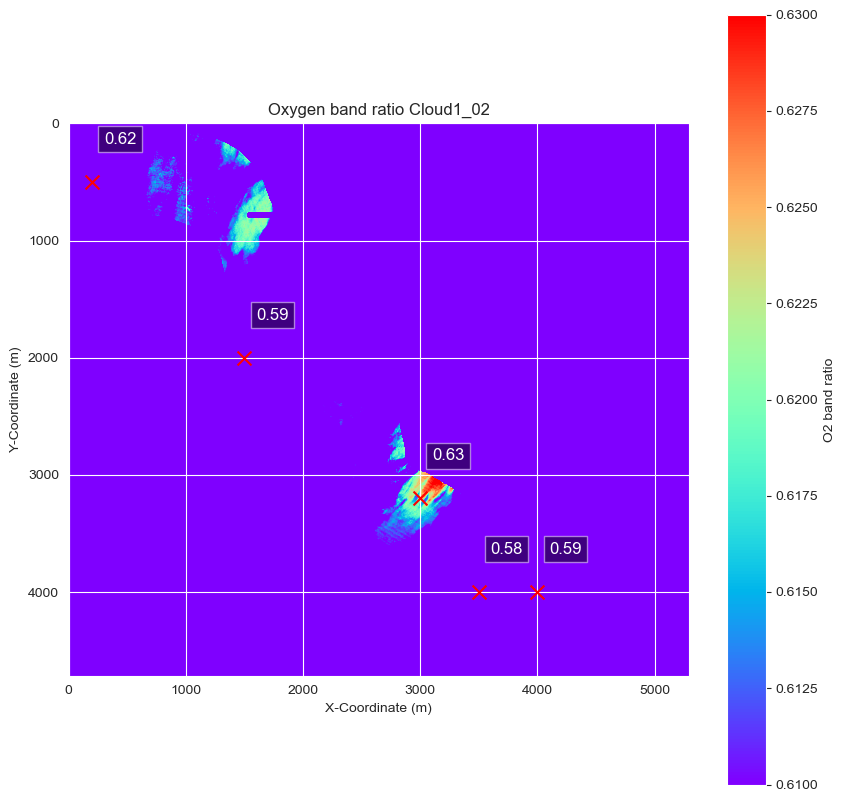

In [12]:

# Define pixel size (0.6 meters per pixel)
pixel_size = 0.6
vmin = 0.61
vmax = 0.63
# Define pixel size (0.6 meters per pixel)
pixel_size = 0.6
xmin, xmax = 0, image_array.shape[1] * pixel_size
ymin, ymax = 0, image_array.shape[0] * pixel_size

# **Specify marker locations (row, col indices)**
marker_positions_m = [(200,500),(1500,2000) ,(3000, 3200),(3500,4000), (4000, 4000)]  # (row, col) in pixel indices
marker_positions_px = [(int(y / pixel_size), int(x / pixel_size)) for x, y in marker_positions_m]
# Convert pixel indices to real coordinates
marker_coords = [(col * pixel_size, row * pixel_size) for row, col in marker_positions_m]

# Plot the image
fig, ax = plt.subplots(figsize=(10, 10))
img = ax.imshow(image_array, cmap="rainbow", origin="upper", extent=[xmin, xmax, ymax, ymin], vmin=vmin, vmax=vmax)
plt.colorbar(img, label="O2 band ratio")
plt.xlabel("X-Coordinate (m)")
plt.ylabel("Y-Coordinate (m)")
plt.title("Oxygen band ratio Cloud1_02")


# Plot markers
for (x_m, y_m), (row, col) in zip(marker_positions_m, marker_positions_px):
    if 0 <= row < image_array.shape[0] and 0 <= col < image_array.shape[1]:  # Check bounds
        value = image_array[row, col]
        ax.scatter(x_m, y_m, color='red', marker='x', s=100)
        ax.text(x_m+100, y_m-300, f"{value:.2f}", color="white", fontsize=12, ha="left", va="bottom",
                bbox=dict(facecolor='black', alpha=0.5))
plt.savefig('data/images/o2_band_ratio_cloud1_02_highs.png',dpi=600,bbox_inches='tight')
plt.show()

In [13]:
image = "cloud1_02"  # Example identifier within the image path

o2_ratios_plot = spectra[spectra['image_file'].str.contains(image, case=False, na=False)]
print(fit_results[fit_results['image_file'].str.contains(image, case=False, na=False)])

NameError: name 'spectra' is not defined

In [ ]:
obs_o2_plot = pd.read_csv('obs_o2_ratio.csv')
print(obs_o2_plot)

In [ ]:
#Convert map colours to heights
line_vmin = 14.584969*vmin-8.393551 
line_vmax = 14.584969*vmax-8.393551

# Scatter plot
plt.figure(figsize=(10, 6))

plt.plot(obs_o2_plot['ratio'], obs_o2_plot['arb'], color='lightgrey',  linewidth=1,zorder=1)

scatter = plt.scatter(
    x=o2_ratios_plot['o2_ratio'],
    y=o2_ratios_plot['zSurface'],
    c=o2_ratios_plot['zSurface'],
    cmap='rainbow',
    edgecolor='k',
    s=50,
    vmin=line_vmin,
    vmax=line_vmax
)

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Surface height km', fontsize=12)

# Add labels and title
plt.xlabel('O2 band ratio', fontsize=12)
plt.ylabel('Surface height km', fontsize=12)
plt.title('Simulated O2 band ratio for Hamilton Island campaign', fontsize=14)
plt.xlim(0.575,0.645)
plt.ylim(0,1)
# Show the plot
plt.tight_layout()
plt.savefig('o2_ratio_vs_height_withobs.png',dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
# Open the BSQ file with rasterio
with rasterio.open(filepath) as src:
    # Read the image data as a 3D numpy array (bands, rows, cols)
    image_array = src.read(1)  # Read only the first band (modify to read multiple)
    mask = image_array == 1
    image_array[mask] = -999
    # Get metadata
    bands = src.count
    rows = src.height
    cols = src.width
    print(f"Image Dimensions: {rows}x{cols}, Bands: {bands}")
    # Mask NoData values (-999) and compute min/max
    valid_pixels = image_array[image_array != -999]
    min_value = np.min(valid_pixels)
    max_value = np.max(valid_pixels)

    print(f"Min Value (Band 1): {min_value}")
    print(f"Max Value (Band 1): {max_value}")

print("Hyperspectral image loaded successfully!")

In [10]:
#output_filepath = r"data/images/cloud1_02_Mjolnir_float32_geo_VS620_out_csw.bsq"  # New output file

# Open the BSQ file with rasterio
with rasterio.open(filepath) as src:
    # Read the image data (only one band)
    image_array = src.read(1)  # This returns a 2D array (rows, cols)   
    mask = image_array == 1
    # Apply the formula: 13.428 * value - 7.6279
    modified_image = (14.585 * image_array - 8.3935)*1000
  # modified_image = (13.428 * image_array - 7.6279)*1000
    modified_image[mask] = 0
    # Preserve metadata (except changing dtype if needed)
    meta = src.meta.copy()
    meta.update(dtype='float32')  # Ensure correct data type

    # Save the modified image as a new BSQ file
    with rasterio.open(output_filepath, 'w', **meta) as dst:
        dst.write(modified_image.astype(np.float32), 1)  # Save as band 1

print(f"Modified BSQ image saved as: {output_filepath}")


Modified BSQ image saved as: data/images/cloud1_02_height_calc.bsq.dat


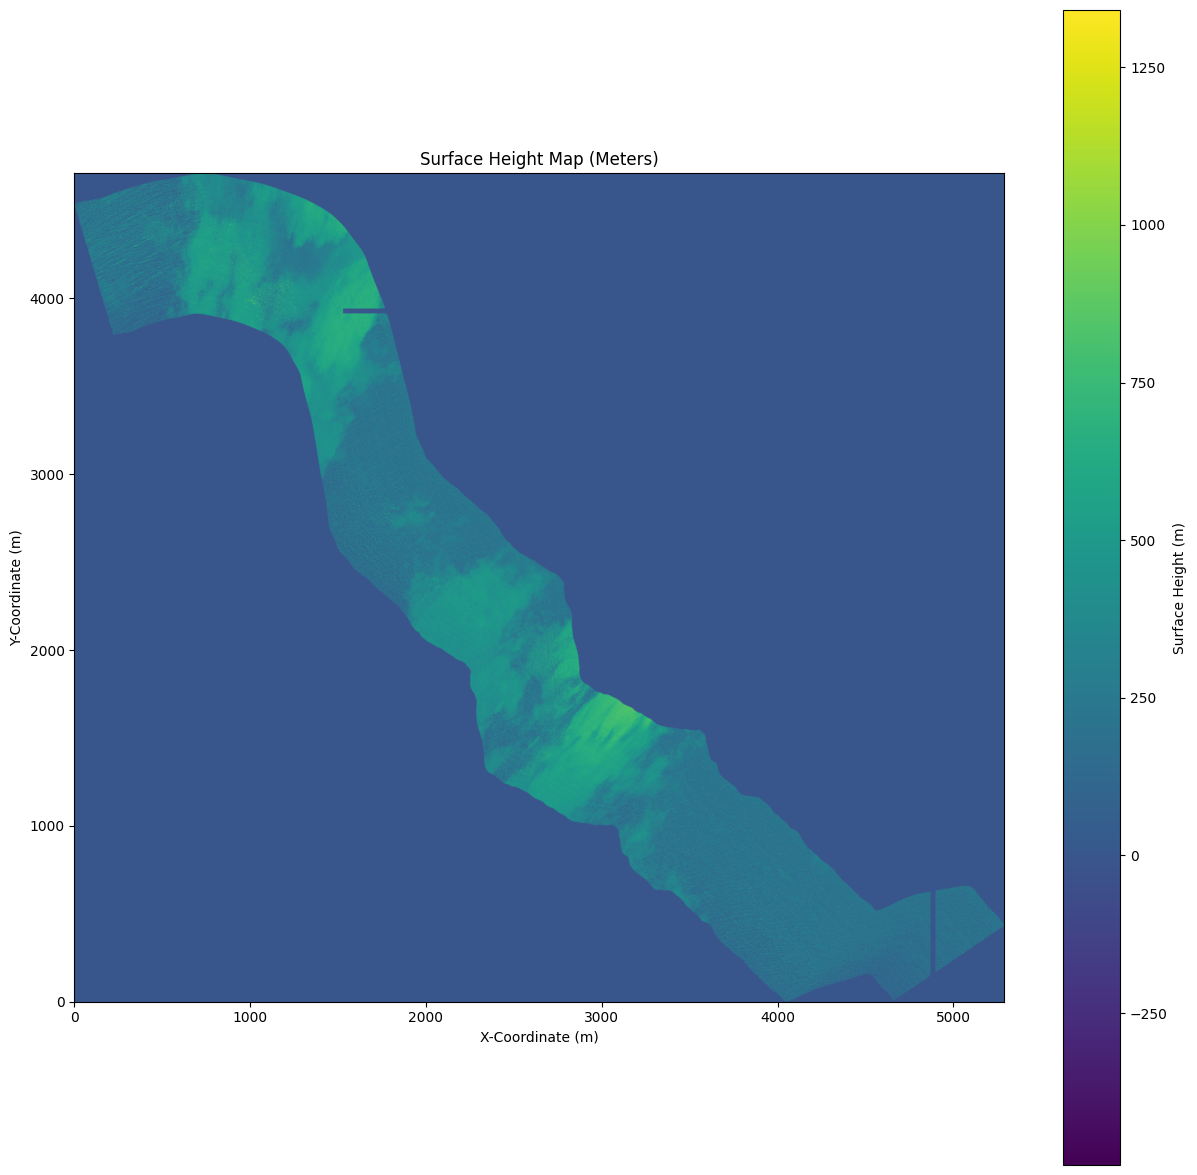

In [12]:
# **Determine scaled coordinates based on pixel size (0.6 meters per pixel)**
x = np.arange(cols) * 0.6  # Scale column indices to meters
y = np.arange(rows) * 0.6  # Scale row indices to meters

# **Visualize the modified image with scaled coordinates**
plt.figure(figsize=(15, 15))
plt.imshow(modified_image, cmap='viridis', origin='upper',
           extent=[x.min(), x.max(), y.min(), y.max()])  # Apply scaling to axes
plt.colorbar(label="Surface Height (m)")
plt.title("Surface Height Map (Meters)")
plt.xlabel("X-Coordinate (m)")
plt.ylabel("Y-Coordinate (m)")
plt.savefig("data/images/calc_surfaceheight.png", bbox_inches='tight')
plt.show()

In [13]:
# **Downsample for faster rendering**
downsample_factor = 10  # Adjust as needed
modified_image = modified_image[::downsample_factor, ::downsample_factor]


In [14]:

# Create X, Y grid
x = np.arange(modified_image.shape[1])
y = np.arange(modified_image.shape[0])
X, Y = np.meshgrid(x, y)

# Create interactive 3D surface plot
fig = go.Figure(data=[go.Surface(z=modified_image, x=X, y=Y, colorscale="Viridis")])
fig.update_layout(title="3D Height Map", scene=dict(
    xaxis_title="X Coordinate",
    yaxis_title="Y Coordinate",
    zaxis_title="Height (Z)",
))

# Show plot
#fig.show()
# **Save as an interactive HTML file**
html_filepath = "3D_plot_try_2.html"
fig.write_html(html_filepath)

In [8]:
# Open the BSQ file with rasterio
with rasterio.open(filepath) as src:
    # Read the image data (only one band)
    image_array = src.read(1)  # This returns a 2D array (rows, cols)

    # Apply the formula: 13.428 * value - 7.6279
    modified_image = (14.585 * image_array - 8.3935)*1000

    # Get metadata for output file
    profile = src.profile

# You can now save the modified image or further process it.
# For example, to save the result:
output_filepath = "data/images/modified_image.tif"
with rasterio.open(output_filepath, 'w', **profile) as dst:
    dst.write(modified_image, 1)

print("Formula applied and image saved!")

Formula applied and image saved!
